<a href="https://colab.research.google.com/github/Vcetpreeti/DS_internship/blob/main/50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
data=pd.read_csv("50_Startups.csv")

In [4]:
print(data.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


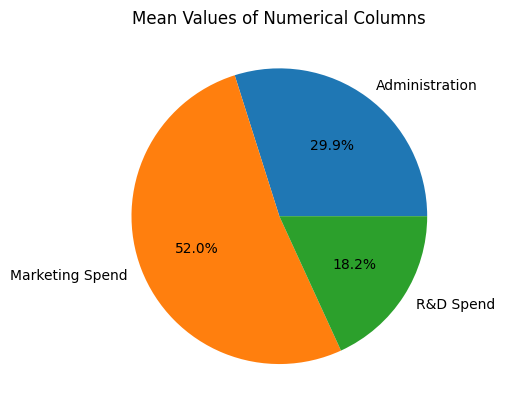

In [17]:
import matplotlib.pyplot as plt
dataset=data[["Administration","Marketing Spend","R&D Spend"]]

# Calculate the mean of only the numerical columns
means = dataset.select_dtypes(include=['float', 'int']).mean()

# Plot the pie chart
plt.pie(means, labels=means.index, autopct='%1.1f%%')
plt.title('Mean Values of Numerical Columns')
plt.show()

In [18]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(data[['State']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['State']))

# Concatenate the original data without the 'State' column and the encoded features
data = pd.concat([data.drop('State', axis=1), encoded_df], axis=1)

# Split the data into features and target variable
X = data.drop('Profit', axis=1)
y = data['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 6961.477813252376
Mean Squared Error: 82010363.04430099
R^2 Score: 0.8987266414328637


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
print(f"Decision Tree MSE: {dt_mse}")

Decision Tree MSE: 132886952.58169992


In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
lr_model = LinearRegression()
# Split the data
X = data.drop('Profit', axis=1)
y = data['Profit']
# Fix: Use 'X' instead of 'x'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Comment out these lines as the variables are not defined
# X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Comment out these lines as the variables are not defined
# X_train_class_scaled = scaler.fit_transform(X_train_class)
# X_test_class_scaled = scaler.transform(X_test_class)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R-squared: {lr_r2}")

Linear Regression MSE: 82010363.04501359
Linear Regression R-squared: 0.8987266414319838
